# Linear Regression
Linear regression is a statistical and machine learning method used to model the relationship between one or more input variables (features) and a continuous target variable.

It predicts a target variable \( y \) based on one or more input features \( x \) using a linear equation:

\[
y = w.x + b
\]

Where:  
- \( y \): Predicted value.  
- \( x \): Input feature(s).  
- \( w \): Weight (slope of the line).  
- \( b \): Bias (y-intercept).  

For multiple features, the equation generalizes to:  
\[
y = w1.x1 + w2.x2 +...+ wn.xn + b
\]


### Weights and Bias

- **Weights \( w \):** Measure the impact of each input feature on the output. Larger weights indicate stronger influence of the feature.  
- **Bias \( b \):** Ensures the model can fit the data correctly even when all input features are zero. It adjusts the output to align with the target.

The goal of training a linear regression model is to find optimal values of \( w \) and \( b \) to minimize prediction errors, for which it uses the gradient descent optimization algorithm.

### Updating values using Gradient Descent

 **Update weight ( w ):**  
  $$ w \leftarrow w - \eta \cdot \frac{\partial L}{\partial w} $$

 **Update bias ( b ):**  
  $$ b \leftarrow b - \eta \cdot \frac{\partial L}{\partial b} $$
Where:  
- $\eta $: Learning rate (controls the step size of parameter updates).  
- $\frac{\partial L}{\partial w} $: Gradient of loss with respect to \( w \).  
- $\frac{\partial L}{\partial b} $: Gradient of loss with respect to \( b \).



### Workflow 

1. **Initialize**  
   Initialize **w** and **b** (often to 0 or small random values).

2. **Compute Predictions**  
   $
   \hat{y} = w \cdot x + b
   $

3. **Calculate Loss**  
   $
   L = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
   $

4. **Compute Gradients**  
   $
   \frac{\partial L}{\partial w}, \frac{\partial L}{\partial b}
  $

5. **Update Parameters**  
   Update **w** and **b** using gradient descent formulas.

6. **Repeat**  
   Repeat for the specified number of iterations or until convergence.


In [1]:
import numpy as np

In [2]:
class Linear_Regression():

   def __init__( self, learning_rate, num_iterations ) :
          self.learning_rate = learning_rate
          self.num_iterations = num_iterations

   def fit( self, X, Y ) :
          
        # no_of_rows, no_of_features
        self.m, self.n = X.shape
    
        self.w = np.zeros( self.n )   
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing Gradient Descent for Optimization          
        for i in range( self.num_iterations ) :   
            self.update_weights()
      
   def update_weights( self ) :
        Y_prediction = self.predict( self.X )
          
        # calculate gradients  
        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m
        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m 
        
        # updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
                
   def predict( self, X ) :
        return X.dot( self.w ) + self.b

In [3]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
# loading the data from csv file to a pandas dataframe
data = pd.read_csv('salary_data.csv')

### Data Preprocessing

In [5]:
data.shape

(30, 2)

In [6]:
data.head(3)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731


In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Our dataset has one feature column 'YearsExperience', that states years of experience an employee has. The target variable is their salary. This is a small dataset, with only 30 observations. However, large datasets are preferred for accurate model training and performance.

#### Plotting data points on graph

Text(0, 0.5, 'Salary')

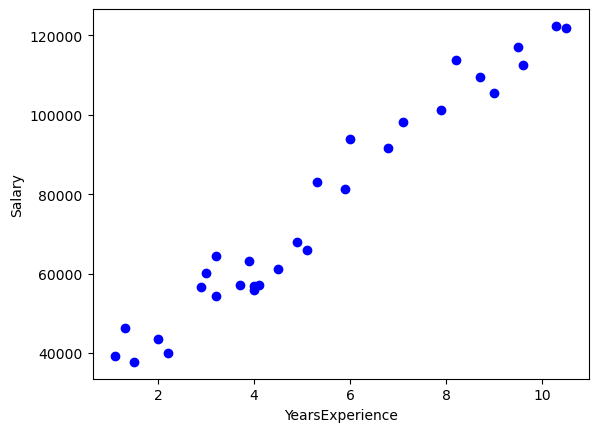

In [8]:
plt.scatter(data['YearsExperience'], data['Salary'], color='blue', label='Data points')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

#### Splitting data into Feature and Target 

In [9]:
X = data.iloc[:,:-1].values      
Y = data.iloc[:,1].values

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2 )

## Training model

In [11]:
model1= Linear_Regression(learning_rate=0.02, num_iterations=500)

In [12]:
model1.fit(X_train, Y_train)

In [13]:
# printing the values weight & bias
print('weight = ', model1.w[0])
print('bias = ', model1.b)

weight =  9579.809759588334
bias =  23229.90197763845


#### Predicting Salaries for Test data

In [14]:
test_data_prediction = model1.predict(X_test)
test_data_prediction

array([ 35683.6546651 ,  33767.69271319,  66339.04589579,  58675.19808812,
        91246.55127072,  80708.76053517, 101784.34200626,  51969.3312564 ,
        42389.52149682,  88372.60834284])

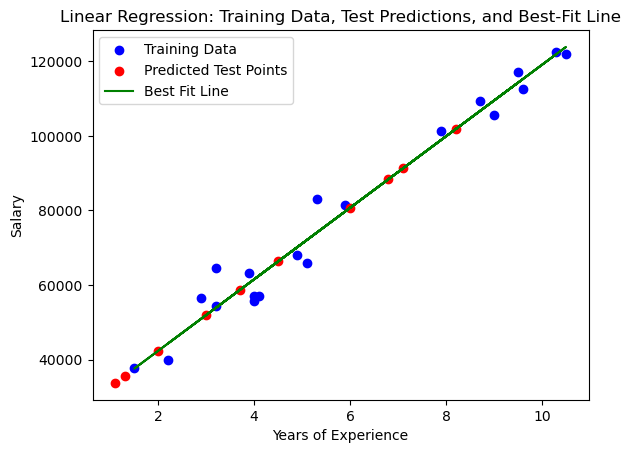

In [15]:
plt.scatter(X_train, Y_train, color="blue", label="Training Data")

plt.scatter(X_test, test_data_prediction, color="red", label="Predicted Test Points")

# Best-fit line
model1_ypreds=model1.predict(X_train)
plt.plot(X_train, model1_ypreds, color="green", label="Best Fit Line")

# Labels and legend
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Training Data, Test Predictions, and Best-Fit Line")
plt.legend()
plt.show()

Let us use model for pedicting salary values for given Years of experience, yrExp

In [16]:
yrExp=6.7

x_array = np.array(yrExp).reshape(-1, 1)
y_predicted = model1.predict(x_array)

y_predicted[0]

87414.62736688029

Thus, the salary of an employee who has a work experience of 6.7 years, can be expected to have a salary of 86506.83

### Understanding how the optimized line was reached

In [17]:
model2= Linear_Regression(learning_rate=0.01, num_iterations=2)
model2.fit(X_train, Y_train)
model2_ypreds= model2.predict(X_train)

In [18]:
model3= Linear_Regression(learning_rate=0.01, num_iterations=50)
model3.fit(X_train, Y_train)
model3_ypreds= model3.predict(X_train)

We can visually demonstrate how the best-fit line is reached over iterations, by plotting the regression line at different stages of training. By showing the models at 5, 50, and 500 iterations, we can illustrate how the model progressively improves its fit to the data. <br>
At 5 iterations, the line will be far from optimal, with noticeable bias and error. At 50 iterations, the line should show significant improvement, though not yet perfectly aligned with the data. Finally, after 100 iterations, the line should closely match the trend in the data, showcasing how the gradient descent algorithm minimizes the loss function and converges to the best-fit solution.

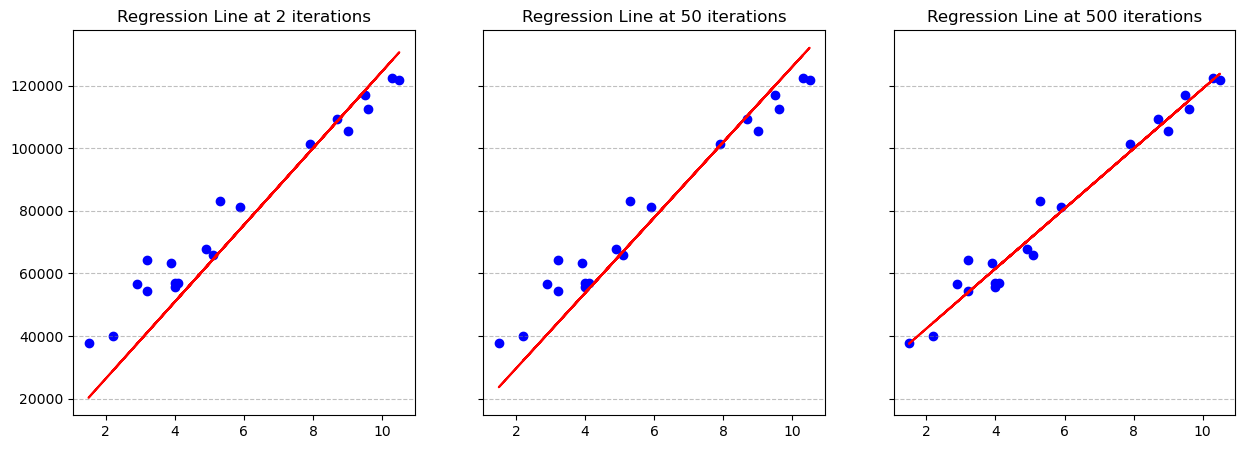

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5),sharey=True)
modelpreds=[model2_ypreds,model3_ypreds,model1_ypreds]
modelnum=[2,50,500]

for i in range(3):
    axs[i].scatter(X_train, Y_train, color='blue')
    axs[i].plot(X_train, modelpreds[i], color='red')
    axs[i].set_title(f'Regression Line at {modelnum[i]} iterations')
    axs[i].grid(True, axis='y', linestyle='--', color='gray', alpha=0.5)


### Comparing with sklearns's LinearRegression
sklearn's LinearRegression model uses a direct, closed-form solution known as Ordinary Least Squares (OLS). Instead of adjusting model parameters iteratively, it computes the optimal coefficients directly by solving a mathematical equation.<br>


In [20]:
from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, Y_train)

LinearRegression()

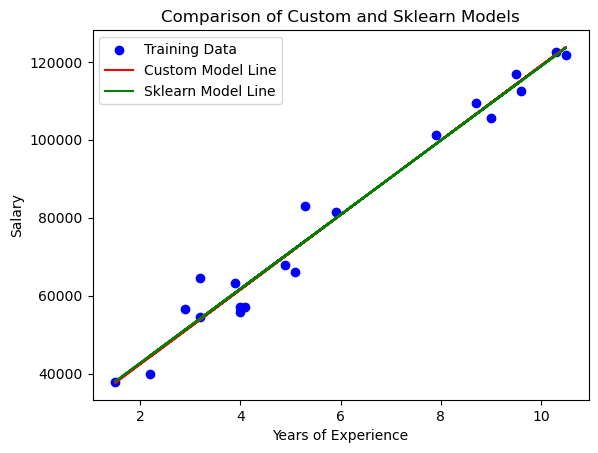

In [21]:
Y_pred_sklearn = model_sklearn.predict(X_train)
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.plot(X_train, model1_ypreds, color='red', label='Custom Model Line')
plt.plot(X_train, Y_pred_sklearn, color='green', label='Sklearn Model Line')
plt.title("Comparison of Custom and Sklearn Models")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()